In [1]:
import pandas as pd
caminho_arquivo = '/content/drive/MyDrive/Aula_DataExploratory/DNSE2017.csv'
sinasc = pd.read_csv(caminho_arquivo, dtype=str)
sinasc.head(10)

,contador,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,CODANOMAL,NUMEROLOTE,VERSAOSIST,DTRECEBIM,DIFDATA,DTRECORIGA,NATURALMAE,CODMUNNATU,CODUFNATU,ESCMAE2010,SERIESCMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,DTULTMENST,SEMAGESTAC,TPMETESTIM,CONSPRENAT,MESPRENAT,TPAPRESENT,STTRABPART,STCESPARTO,TPNASCASSI,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK
0,1,1,2415631,230440,1,24,2,4,999992,01,00,280030,5,1,2,4,10012017,1413,1,09,10,4,3556,2,16012017,NaN,20170003,3.2.01,07022017,028,NaN,823,230075,23,3,NaN,08011993,4,01,00,01,NaN,NaN,40,9,10,NaN,1,2,1,1,NaN,0,NaN,12,0,1,NaN,05,1,9
1,2,1,2005050,270030,1,34,5,4,622020,03,01,280600,5,1,2,3,05042017,1425,1,08,09,4,2760,2,03072017,NaN,20170020,3.2.01,26072017,112,NaN,827,270400,27,3,3,06011983,4,04,03,NaN,NaN,14072016,37,8,05,03,1,2,2,1,NaN,3,05042017,06,0,1,NaN,03,1,3
2,3,1,2005050,270030,1,19,2,4,622020,NaN,NaN,280120,NaN,1,2,4,03042017,1250,1,08,09,4,3010,2,17042017,NaN,20170011,3.2.01,20042017,017,NaN,827,270030,27,3,3,21081997,4,NaN,NaN,NaN,26,NaN,NaN,NaN,08,01,1,1,2,1,NaN,3,03042017,06,0,1,NaN,11,0,5
3,4,1,2005026,270030,1,19,2,4,999992,01,NaN,280440,5,1,2,3,29042017,1615,2,08,09,4,3720,2,17052017,NaN,20170015,3.2.01,18052017,019,NaN,827,270170,27,2,8,10041998,4,01,NaN,01,NaN,08082016,37,8,04,04,1,1,1,1,2,3,29042017,04,0,1,NaN,05,1,2
4,5,1,2722429,270400,1,16,1,4,999991,00,04,280570,5,1,1,3,19042017,1014,1,09,10,4,2900,2,06062017,NaN,20170007,3.2.01,06062017,048,NaN,828,280030,28,3,1,30082000,4,00,00,00,NaN,20072016,38,8,05,05,1,2,3,3,2,4,19042017,05,0,1,NaN,03,1,2
5,6,1,2006472,270430,1,25,1,5,NaN,01,00,280060,5,1,2,4,11012017,2352,2,07,08,4,3515,2,12062017,NaN,20170023,3.2.02,19062017,159,NaN,827,270430,27,4,NaN,23011991,4,01,00,01,NaN,NaN,38,1,07,01,1,2,1,1,2,3,13012017,07,0,1,NaN,05,1,5
6,7,1,2010631,270630,1,36,2,2,612005,03,00,280120,6,1,2,4,20062017,1555,1,08,09,4,3050,2,21072017,NaN,20170009,3.2.01,06092017,078,NaN,828,280450,28,1,NaN,02011981,4,03,03,00,NaN,13082016,44,8,09,02,1,2,2,1,5,4,20062017,10,0,1,NaN,03,1,5
7,8,1,2719290,270640,1,26,1,4,631105,01,00,280560,5,1,1,4,23062017,0825,1,08,09,1,3040,2,03072017,NaN,20170011,3.2.01,03072017,010,NaN,828,280560,28,3,NaN,20091990,1,01,01,00,26,23092016,39,8,14,02,1,2,3,4,5,4,23062017,12,0,1,NaN,03,1,5
8,9,1,2719290,270640,1,21,5,3,621005,01,00,280120,5,1,1,4,03052017,2100,2,08,10,4,2500,2,13082018,NaN,20180013,3.2.01,10092018,495,NaN,827,270640,27,2,7,10071995,4,01,01,00,25,23072016,40,8,07,04,1,2,3,4,5,4,03052017,03,0,1,NaN,03,1,2
9,10,1,2719290,270640,1,30,2,4,621005,01,00,280560,5,1,1,2,04052017,2250,1,08,09,4,2740,2,13082018,NaN,20180013,3.2.01,10092018,494,NaN,828,280030,28,3,2,16101986,4,01,01,00,19,NaN,37,1,02,06,1,2,3,4,5,4,04052017,05,0,1,NaN,03,1,2


In [2]:
sinasc.PESO = pd.to_numeric(sinasc.PESO)
sinasc.IDADEMAE = pd.to_numeric(sinasc.IDADEMAE).astype(pd.Int64Dtype())
sinasc.IDADEPAI = pd.to_numeric(sinasc.IDADEPAI).astype(pd.Int64Dtype())
sinasc.QTDFILVIVO = pd.to_numeric(sinasc.QTDFILVIVO).astype(pd.Int64Dtype())
sinasc.QTDFILMORT = pd.to_numeric(sinasc.QTDFILMORT).astype(pd.Int64Dtype())
sinasc.APGAR1 = pd.to_numeric(sinasc.APGAR1).astype(pd.Int64Dtype())
sinasc.APGAR5 = pd.to_numeric(sinasc.APGAR5).astype(pd.Int64Dtype())
sinasc.SEMAGESTAC = pd.to_numeric(sinasc.SEMAGESTAC).astype(pd.Int64Dtype())
sinasc.CONSPRENAT = pd.to_numeric(sinasc.CONSPRENAT).astype(pd.Int64Dtype())
sinasc.SERIESCMAE = pd.to_numeric(sinasc.SERIESCMAE).astype(pd.Int64Dtype())
sinasc.QTDPARTCES = pd.to_numeric(sinasc.QTDPARTCES).astype(pd.Int64Dtype())
sinasc.QTDPARTNOR = pd.to_numeric(sinasc.QTDPARTNOR).astype(pd.Int64Dtype())
sinasc.QTDGESTANT = pd.to_numeric(sinasc.QTDGESTANT).astype(pd.Int64Dtype())


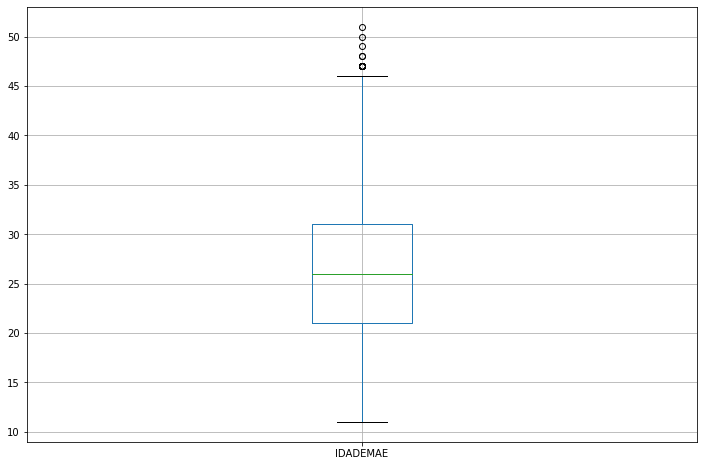

In [ ]:
#Fazer o boxplot para idade da mãe 
bp = sinasc.boxplot(column=['IDADEMAE'], figsize=(12,8))

In [9]:
 #encontrar quais os registro de outliers
 #LI = Q1 — (1,5 * IQR)
 #LS = Q3 + (1,5 * IQR)
q_idade = sinasc.IDADEMAE.quantile([0.25, 0.75]).values
iqr_1 = q_idade[1] - q_idade[0]
iqr_3 = q_idade[1] - q_idade[0]
li = q_idade[0] - (iqr_1 * 1.5)
ls = q_idade[1] + (iqr_3 * 1.5)

outliers = sinasc[(sinasc.IDADEMAE < li) | (sinasc.IDADEMAE > ls)]
outliers[['IDADEMAE']]

,IDADEMAE
22,47
3110,47
3575,47
3922,49
8371,48
12520,47
17054,47
18699,48
20801,50
23171,47


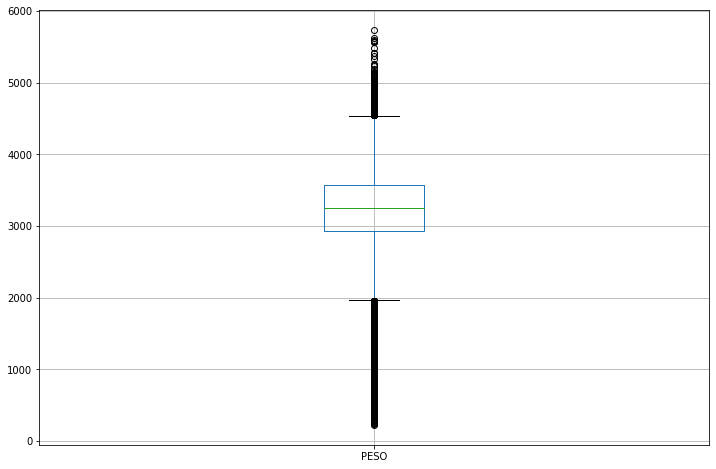

In [5]:
#Fazer o boxplot para o peso da criança
bp = sinasc.boxplot(column=['PESO'],figsize=(12,8))

In [8]:
#encontrar quais os registro de outliers
 #LI = Q1 — (1,5 * IQR)
 #LS = Q3 + (1,5 * IQR)
q_peso = sinasc.PESO.quantile([0.25, 0.75]).values
iqr_1 = q_peso[1] - q_peso[0]
iqr_3 = q_peso[1] - q_peso[0]
li = q_peso[0] - (iqr_1 * 1.5)
ls = q_peso[1] + (iqr_3 * 1.5)

outliers = sinasc[(sinasc.PESO < li) | (sinasc.PESO > ls)]
outliers[['PESO']]

,PESO
30,1455.0
76,5570.0
119,4630.0
146,1830.0
147,1740.0
...,...
33783,1520.0
33817,4600.0
33826,4800.0
33833,5190.0


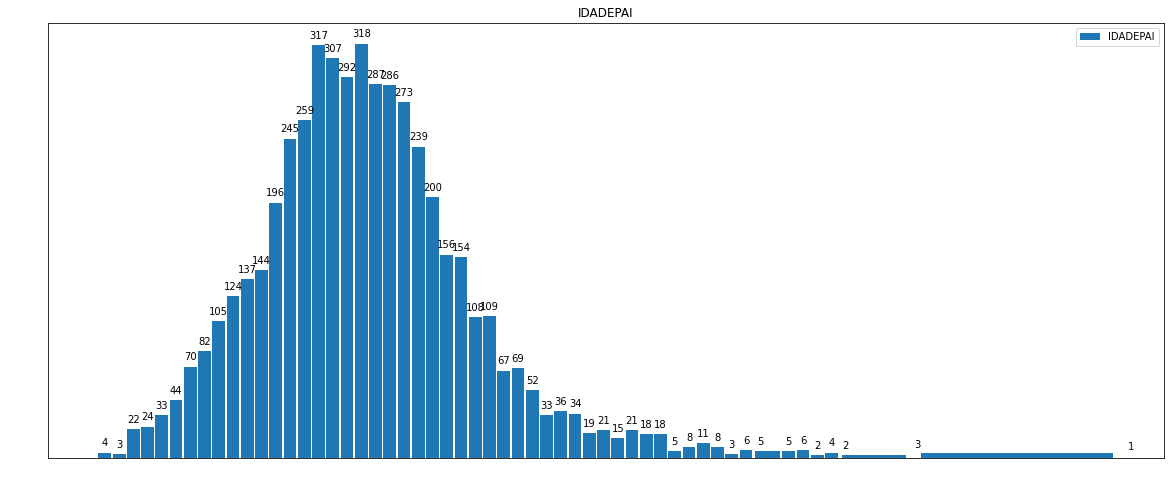

In [12]:
#Fazer o histograma da idade do pai
values = sinasc.IDADEPAI.value_counts(sort=False)
hist = sinasc.hist(
    column='IDADEPAI', bins=sorted(values.keys()), grid=False, figsize=(20,8), rwidth=0.9, legend=True
)

hist[0][0].tick_params(colors='white')
hist[0][0].xaxis.label.set_color('white')
hist[0][0].yaxis.label.set_color('white')
r = hist[0][0].set_xlabel('Idade')
r = hist[0][0].set_ylabel('Fequência')
r = hist[0][0].set_ylabel('Fequência')

x_ticks = []
for key, value in bins_values.items():
  x_ticks.append(key)
  hist[0][0].text(key+0.5, value+5, int(value), ha='center')
t = hist[0][0].set_xticks(x_ticks)

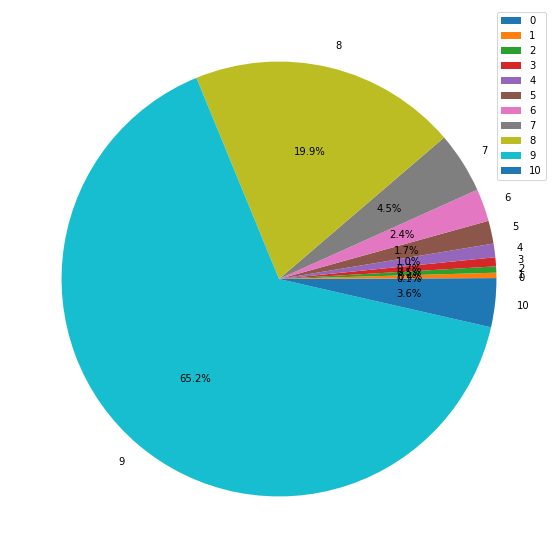

In [90]:
# APGAR 1 com grágico de pizza
grupo = sinasc.groupby(by='APGAR1').count()
pizza = grupo[['contador']].plot(y='contador',  kind='pie', autopct='%1.1f%%', figsize=(25,10))
r = pizza.set(xlabel='', ylabel='')

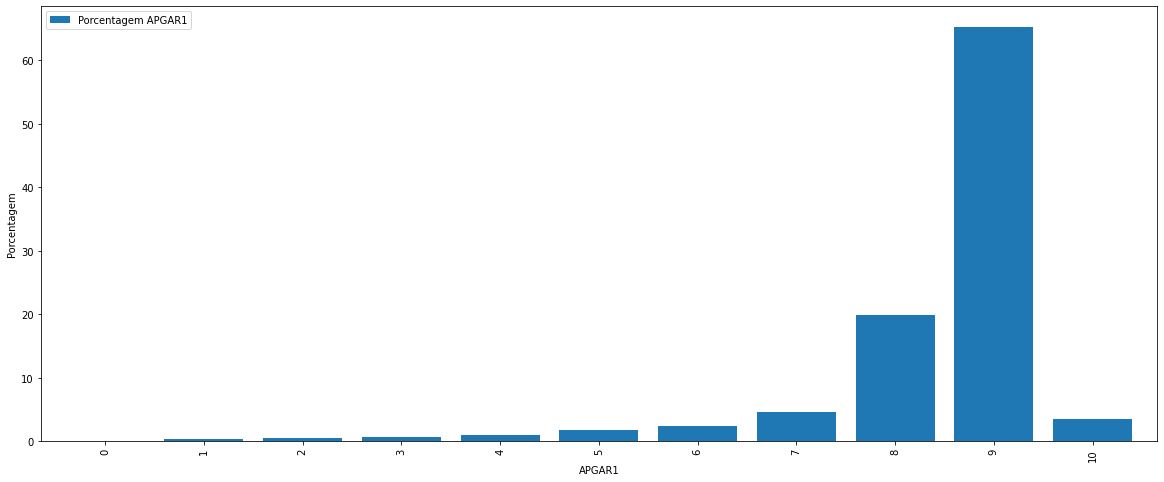

In [84]:
# APGAR 1 com grágico de barra
grupo = sinasc.groupby(by='APGAR1').count()
freq_perc = grupo['contador']*100/grupo['contador'].sum()
barras = freq_perc.plot(kind='bar', width=0.8, figsize=(20,8))
r = barras.set(ylabel='Porcentagem')
r = barras.legend(["Porcentagem APGAR1"]);


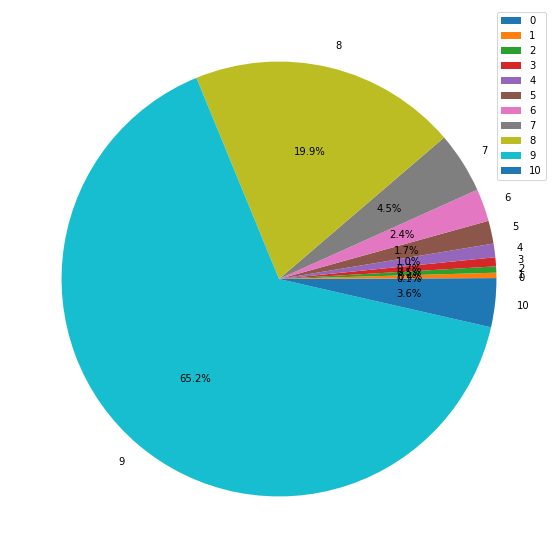

In [62]:
# APGAR 1 com grágico de pizza
grupo = sinasc.groupby(by='APGAR1').count()
pizza = grupo[['contador']].plot(y='contador',  kind='pie', autopct='%1.1f%%', figsize=(25,10))
r = pizza.set(xlabel='', ylabel='')

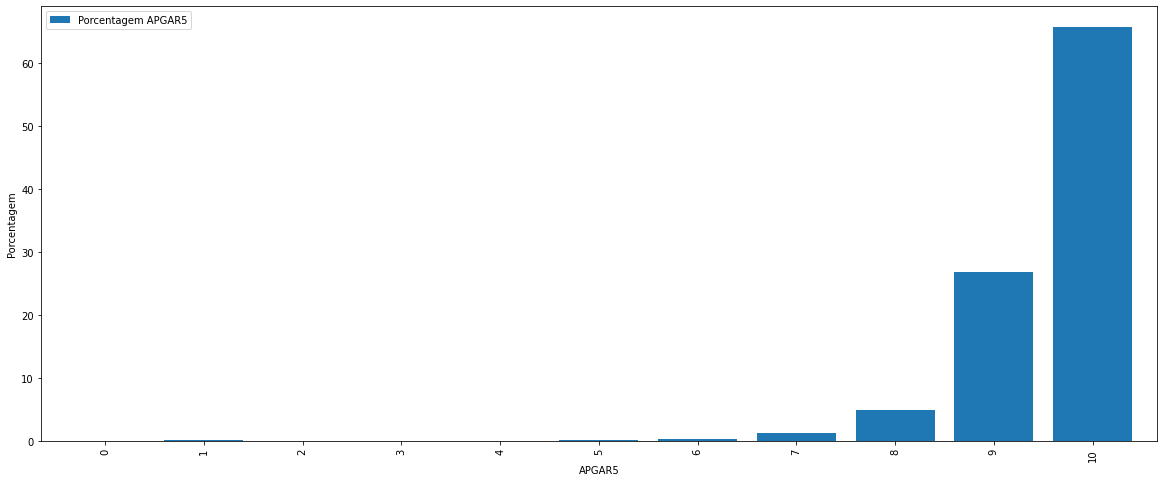

In [83]:
# APGAR 5 com grágico de barra
grupo = sinasc.groupby(by='APGAR5').count()
freq_perc = grupo['contador']*100/grupo['contador'].sum()
barras = freq_perc.plot(kind='bar', width=0.8, figsize=(20,8))
r = barras.set(ylabel='Porcentagem')
r = barras.legend(["Porcentagem APGAR5"]);

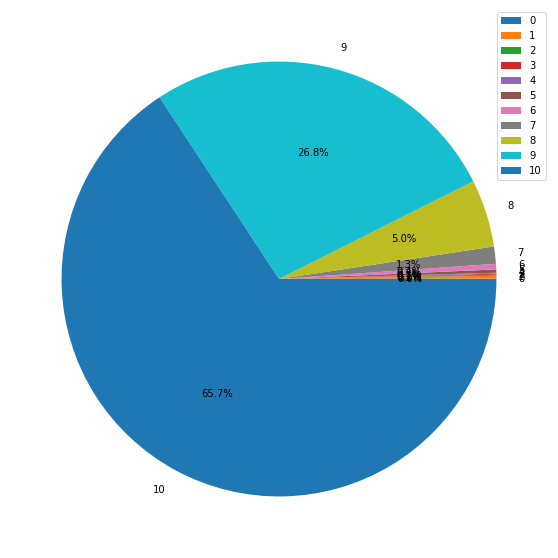

In [64]:
# APGAR 5 com grágico de pizza
grupo = sinasc.groupby(by='APGAR5').count()
pizza = grupo[['contador']].plot(y='contador',  kind='pie', autopct='%1.1f%%', figsize=(25,10))
r = pizza.set(xlabel='', ylabel='')

Text(0.5, 0.98, 'Gráfio de dispersão entre a idade da mãe a e idade do pai')

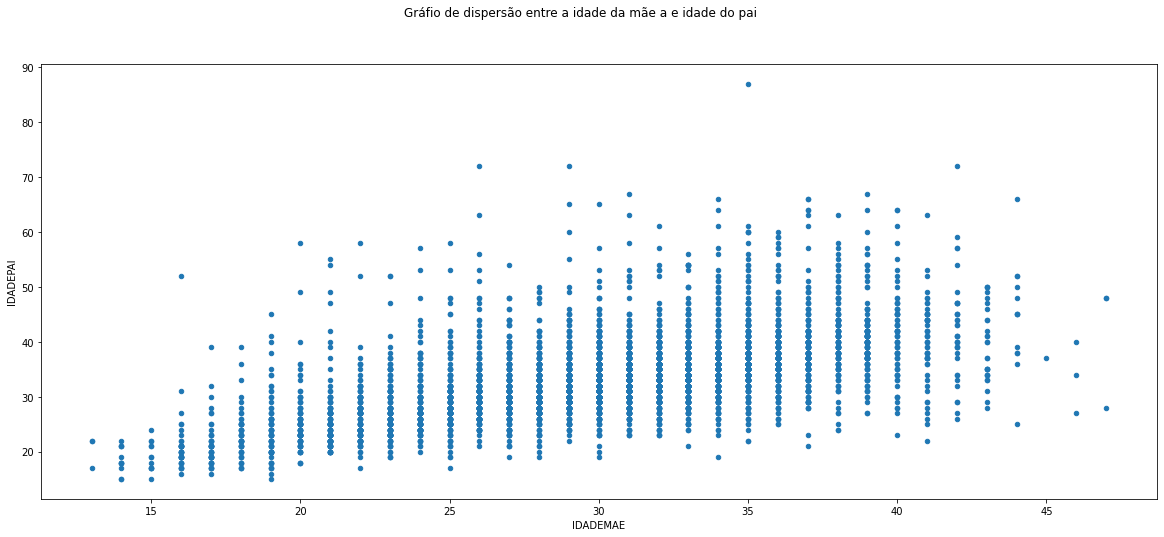

In [82]:
import pylab as pl
# Dispersão entre idade do pai e idade da mão
idade = sinasc[(sinasc.IDADEPAI.notna())][['IDADEMAE', 'IDADEPAI']]
dispersao = idade.plot(kind='scatter',x='IDADEMAE', y='IDADEPAI', figsize=(20,8))

pl.suptitle("Gráfio de dispersão entre a idade da mãe a e idade do pai")

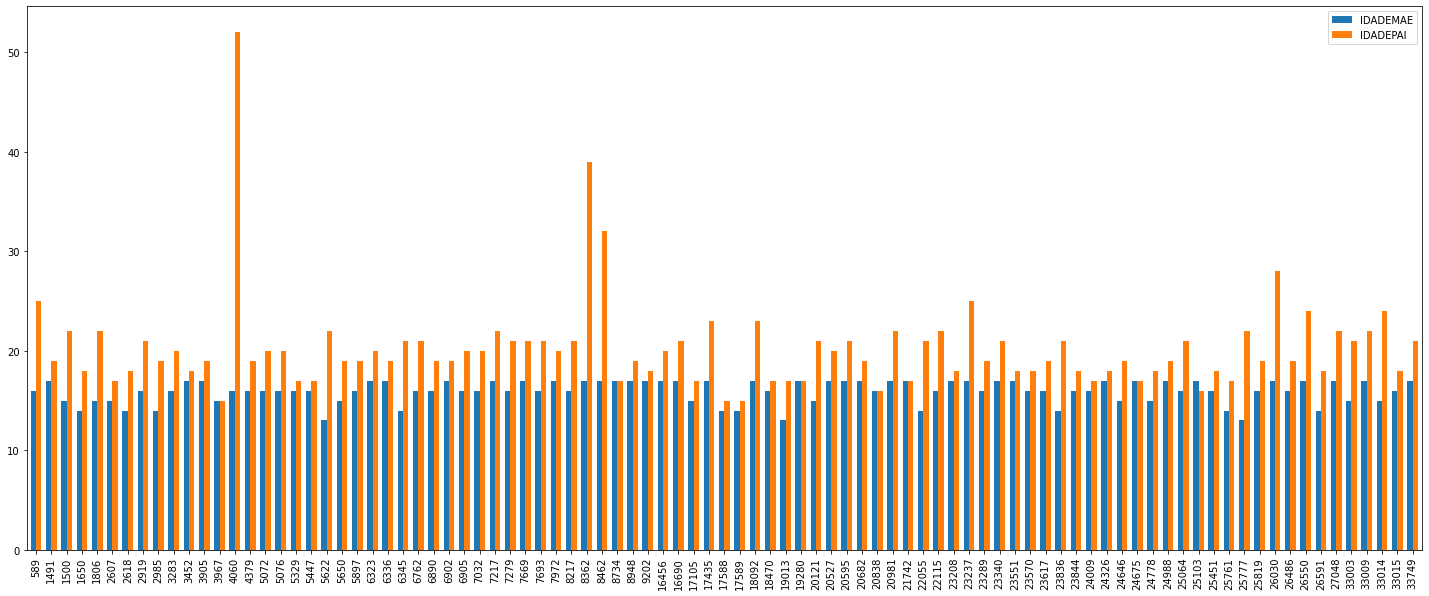

In [76]:
# comparação entre idade da mãe e idade do pai para as mães solteiras com menos de 18 anos
idade = sinasc[(sinasc.IDADEMAE < 18) & (sinasc.ESTCIVMAE== '1') & (sinasc.IDADEPAI.notna())][['IDADEMAE', 'IDADEPAI']]
graf_barras = idade.plot(kind='bar', width=0.7, figsize=(25,10))



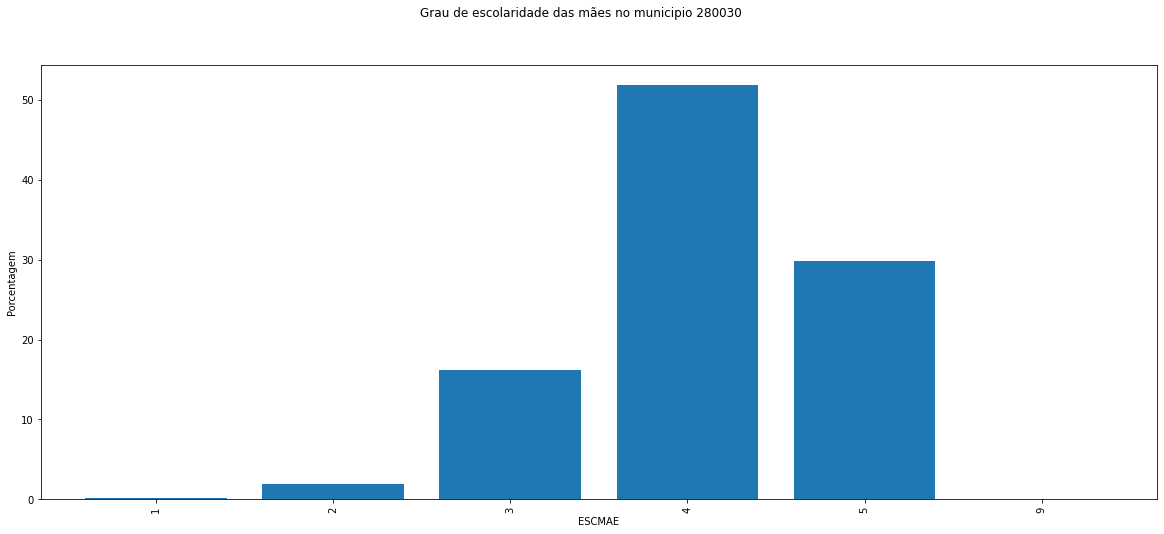

In [89]:
#Escolaridade das maes por municipio (capital)

capital = sinasc[sinasc.CODMUNRES == '280030']

grupo = capital.groupby(by='ESCMAE').count()
freq_perc = grupo['contador']*100/grupo['contador'].sum()
barras = freq_perc.plot(kind='bar', width=0.8, figsize=(20,8))
pl.suptitle("Grau de escolaridade das mães no municipio 280030")
r = barras.set(ylabel='Porcentagem')

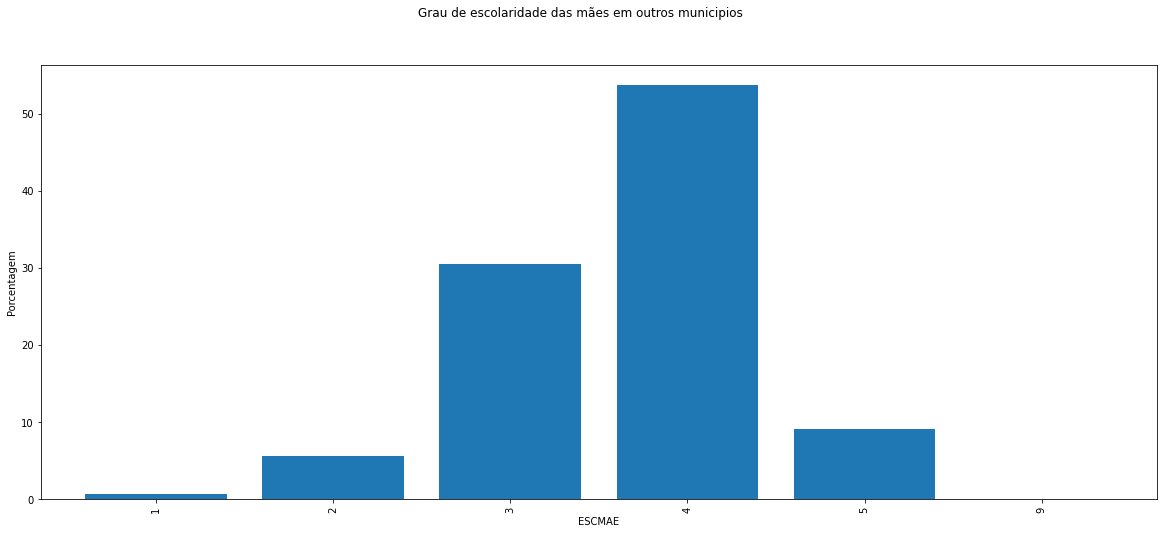

In [87]:
#Escolaridade das maes (demais municipios)
outras = sinasc[sinasc.CODMUNRES != '280030']

grupo = outras.groupby(by='ESCMAE').count()
freq_perc = grupo['contador']*100/grupo['contador'].sum()
barras = freq_perc.plot(kind='bar', width=0.8, figsize=(20,8))
pl.suptitle("Grau de escolaridade das mães em outros municipios")
r = barras.set(ylabel='Porcentagem')